In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

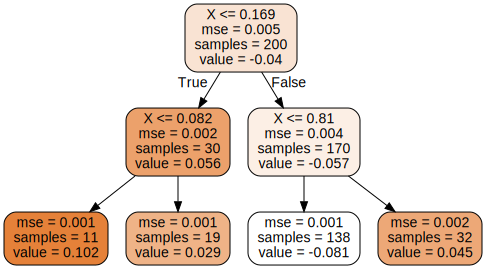

In [143]:
np.random.seed(123)
X = np.random.rand(200,1)
y = (X**2) + (0.3**2) - (2*X*0.5) + np.random.rand(200,1) /10
tree_reg1 = DecisionTreeRegressor(random_state=42,max_depth =2)
tree_reg1.fit(X,y)
tree_reg2 = DecisionTreeRegressor(random_state=42,max_depth =3)
tree_reg2.fit(X,y)

graph1 = export_graphviz(tree_reg1,feature_names="X",class_names="y",filled=True,rounded=True)
tree1 = graphviz.Source(graph1, format="png")
tree1


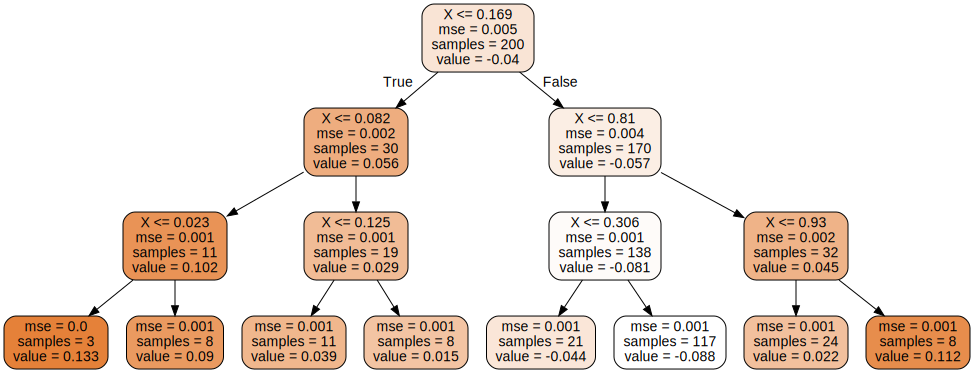

In [144]:
graph2 = export_graphviz(tree_reg2,feature_names="X",class_names="y",filled=True,rounded=True)
tree2 = graphviz.Source(graph2, format="png")
tree2

Text(0.5, 0.98, 'Predictions of two Decision Tree regression models')

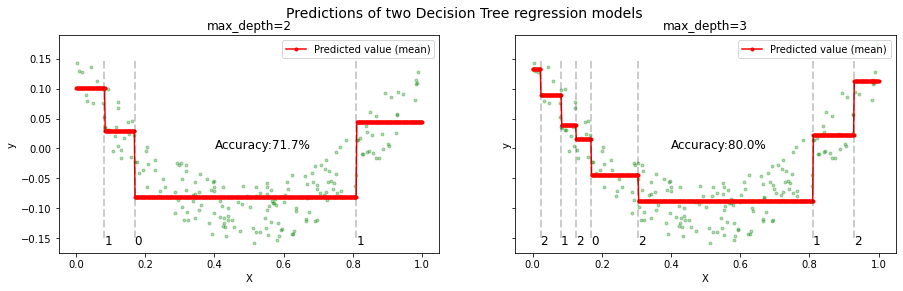

In [169]:
# Representation of depth in the plot

def plotDecisionBoundaries(X,y,model,title,bound,axes):
  plt.sca(axes)
  plt.plot(X,y,"g.", alpha=0.3)
  x1 = np.linspace(0,1,500).reshape(-1,1)
  predict = model.predict(x1)
  plt.plot(x1,predict,"r.-", label="Predicted value (mean)")
  for split in bound:
     plt.plot([split, split], [-0.15, 0.15], style, linewidth=2,alpha=0.2)
  plt.title(title)
  plt.text(0.4,0,f"Accuracy:{round(model.score(X,y),3)*100}%",fontsize=12)
  plt.legend(loc="upper right")
  plt.xlabel("X")
  plt.ylabel("y")

def plotBasicDepthText():
  plt.text(0.169,-0.16,"0",fontsize=12)
  plt.text(0.082,-0.16,"1",fontsize=12)
  plt.text(0.81,-0.16,"1",fontsize=12)

fig, axes = plt.subplots(ncols=2, figsize=(15, 4), sharey=True)
plotDecisionBoundaries(X,y,tree_reg1,"max_depth=2",(0.169,0.082,0.81),axes[0])
plotBasicDepthText()

plotDecisionBoundaries(X,y,tree_reg2,"max_depth=3",(0.169,0.082,0.81,0.023,0.125,0.306,0.93),axes[1])
plotBasicDepthText()
plt.text(0.023,-0.16,"2",fontsize=12)
plt.text(0.125,-0.16,"2",fontsize=12)
plt.text(0.306,-0.16,"2",fontsize=12)
plt.text(0.93,-0.16,"2",fontsize=12)
plt.suptitle("Predictions of two Decision Tree regression models",fontsize=14)

Text(0.5, 0.98, 'Regularizing a Decision Tree regressor')

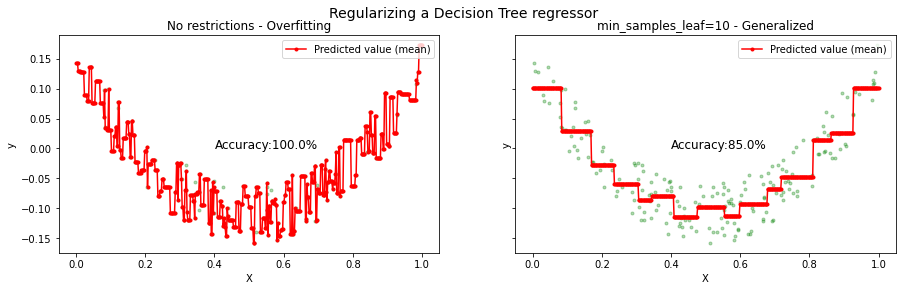

In [170]:
tree_reg3 = DecisionTreeRegressor(random_state=42)
tree_reg4 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg3.fit(X,y)
tree_reg4.fit(X,y)

fig, axes = plt.subplots(ncols=2, figsize=(15, 4), sharey=True)
plotDecisionBoundaries(X,y,tree_reg3,"No restrictions - Overfitting",(),axes[0])
plotDecisionBoundaries(X,y,tree_reg4,"min_samples_leaf=10 - Generalized",(),axes[1])
plt.suptitle("Regularizing a Decision Tree regressor",fontsize=14)

In [163]:
print(tree_reg1.score(X,y))
print(tree_reg2.score(X,y))
print(tree_reg3.score(X,y))
print(tree_reg4.score(X,y))

0.7171979225272562
0.7995581500451152
0.9999995123125085
0.8498867874456356
